# **Importing required packages**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings("ignore")

#**Documentation for Importing Required Packages**

**The following Python code snippet imports various libraries and modules for data analysis, visualization, and machine learning. Additionally, it suppresses warning messages using the `warnings` module.**

- **NumPy (`np`):** A library for numerical operations in Python.
- **Pandas (`pd`):** A data manipulation library that provides data structures like DataFrame.
- **Matplotlib (`plt`):** A plotting library for creating static, animated, and interactive visualizations.
- **Axes3D from mpl_toolkits.mplot3d:** A module for 3D plotting in Matplotlib.
- **Plotly Express (`px`):** A high-level interface for creating interactive plots using Plotly.
- **Plotly Graph Objects (`go`):** A module for creating interactive plots using Plotly.
- **Seaborn (`sns`):** A statistical data visualization library based on Matplotlib.
- **train_test_split from sklearn.model_selection:** A function for splitting datasets into training and testing sets.
- **KMeans from sklearn.cluster:** A clustering algorithm for partitioning data into clusters.
- **mean_squared_error, r2_score, mean_absolute_error from sklearn.metrics:** Evaluation metrics for regression models.
- **PCA from sklearn.decomposition:** Principal Component Analysis for dimensionality reduction.
- **LinearDiscriminantAnalysis from sklearn.discriminant_analysis:** Linear Discriminant Analysis for feature extraction.
- **warnings:** A module for handling warning messages; warnings are suppressed using `filterwarnings`.



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ECommerce_consumer behaviour.csv to ECommerce_consumer behaviour.csv


**from google.colab import files:** Imports the files module from the Google Colab library.
**uploaded=files.upload():** Executes the command to upload files.

In [ ]:
Dataset = pd.read_csv('ECommerce_consumer behaviour.csv')
Dataset

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [ ]:
Dataset.shape

(2019501, 12)

**Dataset.shape** is used to check the dimensions of a DataFrame in Python using the Pandas library

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


The **Dataset.info()** method in Pandas is used to print a concise summary of a DataFrame, including information about the data types, non-null values, and memory usage.

In [ ]:
Dataset.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

The code **Dataset.isnull().sum()** is used to count the number of missing (NaN) values in each column of the Pandas DataFrame df. The **isnull()** method creates a boolean mask indicating whether each element in the DataFrame is null, and then **sum()** is applied to count the number of True values (missing values) in each column.

In [ ]:
Dataset['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

**unique():** This method is applied to the extracted column and returns an array of unique values in that column.

In [ ]:
# replace null value into zero beacause this is the first buy for the customer
Dataset['days_since_prior_order'].fillna(0, inplace=True)

The code **Dataset['days_since_prior_order'].fillna(0, inplace=True)** is used to fill missing (NaN) values in the 'days_since_prior_order' column of the Pandas DataFrame df with the value 0. The inplace=True parameter modifies the DataFrame in place, meaning the changes are applied directly to the original DataFrame rather than creating a new one.

In [ ]:
# Converting Data Types
Dataset['days_since_prior_order']= Dataset['days_since_prior_order'].astype(np.int64)

The code **Dataset['days_since_prior_order'] = Dataset['days_since_prior_order'].astype(np.int64)** is used to convert the 'days_since_prior_order' column in the Pandas DataFrame Dataset to the integer data type (np.int64).

In [ ]:
Dataset['days_since_prior_order'].isnull().sum()

0

The code **Dataset['days_since_prior_order'].isnull().sum()** is used to count the number of missing (NaN) values in the 'days_since_prior_order' column of the Pandas DataFrame Dataset. It utilizes the isnull() method to create a boolean mask indicating whether each element in the column is null, and then sum() is applied to count the number of True values, which represent missing values.

In [ ]:
Dataset.drop(['product_name', 'department'], axis=1, inplace=True)

The code **Dataset.drop(['product_name', 'department'], axis=1, inplace=True)** is used to remove the specified columns ('product_name' and 'department') from the Pandas DataFrame Dataset. The axis=1 parameter indicates that columns should be dropped, and inplace=True means that the changes should be applied directly to the original DataFrame.

# **Data Visualization**

Text(0, 0.5, 'Number of Orders')

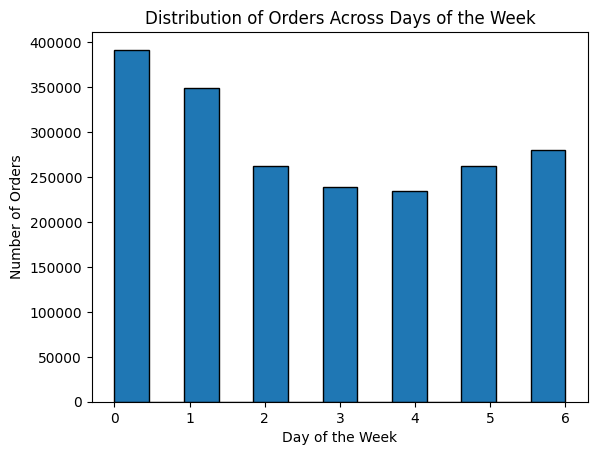

In [ ]:
plt.hist(Dataset['order_dow'],bins=13, edgecolor='black')
plt.title('Distribution of Orders Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')


1. **Creating a Histogram using Matplotlib:**
   - `plt.hist(Dataset['order_dow'], bins=13, edgecolor='black')`: This line creates a histogram of the 'order_dow' column from the DataFrame `Dataset`. The data is divided into 13 bins (representing each day of the week), and the edges of the bins are colored black for better visibility.

2. **Adding a Title to the Plot:**
   - `plt.title('Distribution of Orders Across Days of the Week')`: This line adds a title to the plot, indicating that it represents the distribution of orders across different days of the week.

3. **Labeling the X-axis:**
   - `plt.xlabel('Day of the Week')`: This line labels the x-axis as 'Day of the Week'.

4. **Labeling the Y-axis:**
   - `plt.ylabel('Number of Orders')`: This line labels the y-axis as 'Number of Orders'.



# **Correlation between variable**

Text(0.5, 1.0, 'Correlation Matrix')

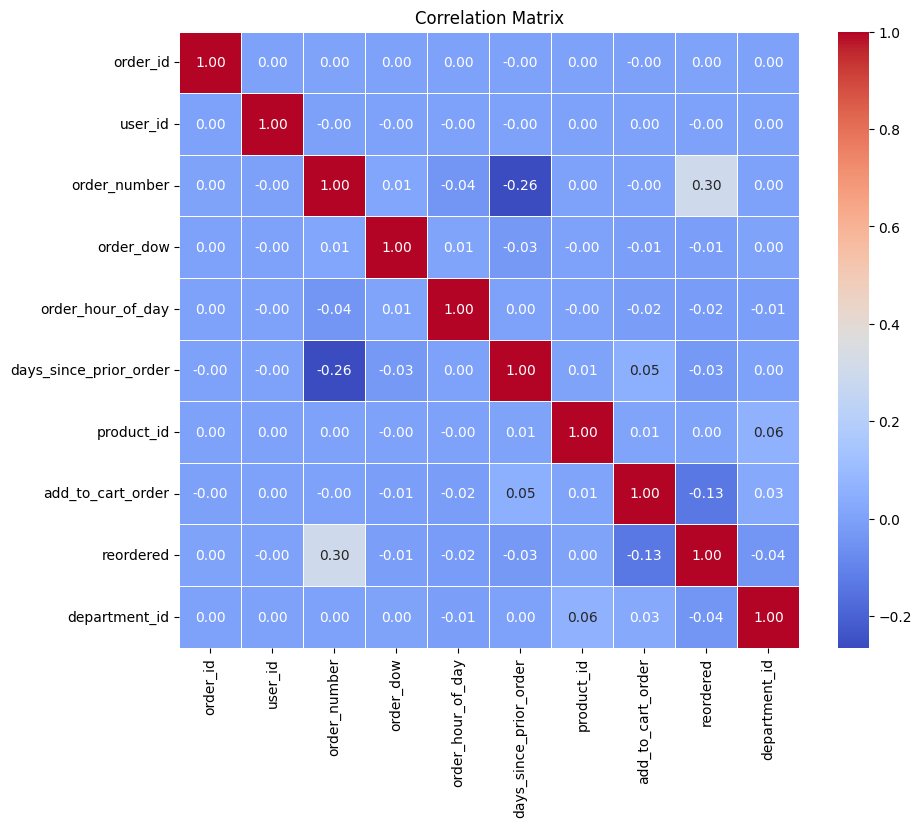

In [ ]:
corr_matrix = Dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')



1. **Creating a Correlation Matrix:**
   - `corr_matrix = Dataset.corr()`: This line computes the correlation coefficients between different numerical variables in the DataFrame `Dataset` and stores the result in the `corr_matrix` variable.

2. **Setting up the Figure Size:**
   - `plt.figure(figsize=(10, 8))`: This line sets up the figure size for the plot to be 10 units in width and 8 units in height using Matplotlib.

3. **Generating a Heatmap using Seaborn:**
   - `sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)`: This line uses Seaborn to create a heatmap of the correlation matrix. The `annot=True` parameter adds the correlation values to the cells, `cmap='coolwarm'` sets the color map, `fmt='.2f'` formats the annotations to display two decimal places, and `linewidths=.5` adds lines between the cells for better visibility.

4. **Adding a Title to the Plot:**
   - `plt.title('Correlation Matrix')`: This line adds a title to the plot, indicating that it represents a correlation matrix.



# **Countplot of the number of products in each department**

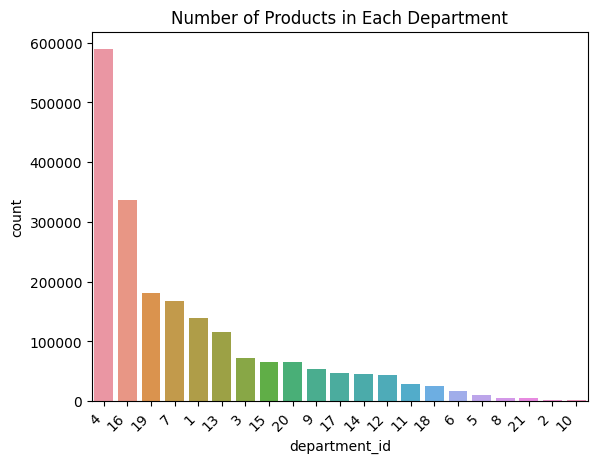

In [ ]:
sns.countplot(x='department_id', data=Dataset, order=Dataset['department_id'].value_counts().index)
plt.title('Number of Products in Each Department')
plt.xticks(rotation=45, ha='right')
plt.show()


1. **Creating a Count Plot using Seaborn:**
   - `sns.countplot(x='department_id', data=Dataset, order=Dataset['department_id'].value_counts().index)`: This line uses Seaborn to create a count plot. It counts the occurrences of each unique value in the 'department_id' column of the DataFrame `Dataset` and orders the bars based on the count.

2. **Adding a Title to the Plot:**
   - `plt.title('Number of Products in Each Department')`: This line adds a title to the plot, indicating that it represents the number of products in each department.

3. **Rotating and Aligning X-axis Labels for Better Visibility:**
   - `plt.xticks(rotation=45, ha='right')`: This line rotates the x-axis labels by 45 degrees and aligns them to the right for better visibility.

4. **Displaying the Plot:**
   - `plt.show()`: This line displays the generated count plot.



# **Top 20 Sold Products**

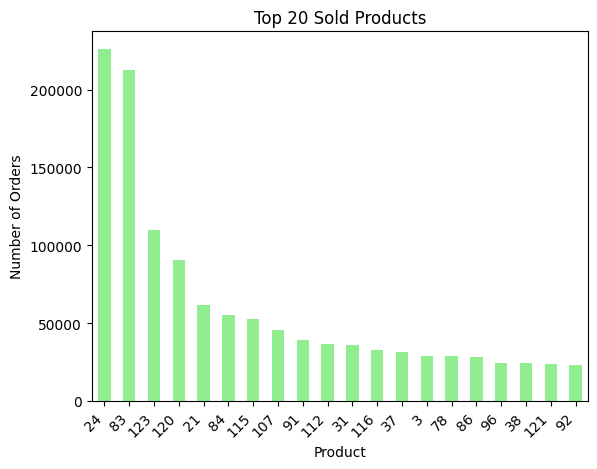

In [ ]:
product_counts = Dataset['product_id'].value_counts()

top_products = product_counts.head(20)

top_products.plot(kind='bar', color='lightgreen')
plt.title('Top 20 Sold Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()


1. **Counting the Occurrences of Each Product:**
   - `product_counts = Dataset['product_id'].value_counts()`: This line counts the occurrences of each unique product in the 'product_id' column of the DataFrame `Dataset`.

2. **Selecting the Top 20 Sold Products:**
   - `top_products = product_counts.head(20)`: This line selects the top 20 sold products based on the previously computed counts.

3. **Creating a Bar Plot for the Top 20 Sold Products:**
   - `top_products.plot(kind='bar', color='lightgreen')`: This line creates a bar plot to visualize the top 20 sold products, with bars colored in lightgreen.

4. **Adding a Title and Labels:**
   - `plt.title('Top 20 Sold Products')`: This line adds a title to the plot.
   - `plt.xlabel('Product')` and `plt.ylabel('Number of Orders')`: These lines label the x-axis and y-axis, respectively.

5. **Rotating and Aligning X-axis Labels:**
   - `plt.xticks(rotation=45, ha='right')`: This line rotates the x-axis labels by 45 degrees and aligns them to the right for better visibility.

6. **Displaying the Plot:**
   - `plt.show()`: This line displays the generated bar plot.



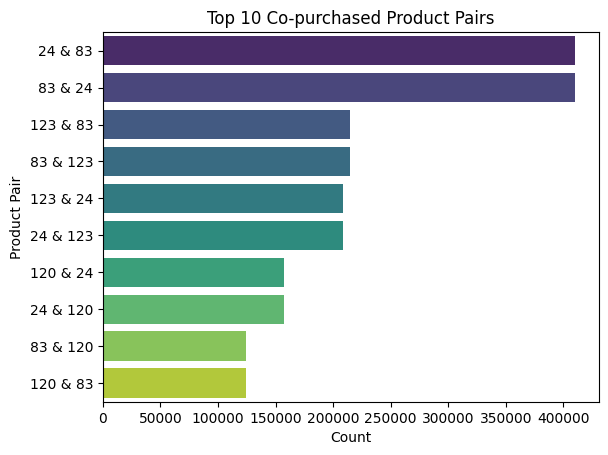

In [ ]:
order_products = Dataset[['order_id', 'product_id']]
merged_products = pd.merge(order_products, order_products, on='order_id')
co_purchased_products = merged_products[merged_products['product_id_x'] != merged_products['product_id_y']][['product_id_x', 'product_id_y']]
common_pairs = co_purchased_products.value_counts().reset_index(name='count')
top_pairs = common_pairs.head(10)

sns.barplot(x='count', y=top_pairs['product_id_x'].astype(str) + ' & ' + top_pairs['product_id_y'].astype(str), data=top_pairs, palette='viridis')
plt.title('Top 10 Co-purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()



1. **Extracting Relevant Columns:**
   - `order_products = Dataset[['order_id', 'product_id']]`: This line extracts the 'order_id' and 'product_id' columns from the DataFrame `Dataset`.

2. **Creating Pairs of Co-purchased Products:**
   - `merged_products = pd.merge(order_products, order_products, on='order_id')`: This line creates pairs of co-purchased products by merging the `order_products` DataFrame with itself based on the 'order_id'.
   - `co_purchased_products = merged_products[merged_products['product_id_x'] != merged_products['product_id_y']][['product_id_x', 'product_id_y']]`: This line filters out pairs where the product IDs are the same.

3. **Counting the Occurrences of Each Co-purchased Product Pair:**
   - `common_pairs = co_purchased_products.value_counts().reset_index(name='count')`: This line counts the occurrences of each co-purchased product pair and resets the index to create a DataFrame.

4. **Selecting the Top 10 Co-purchased Product Pairs:**
   - `top_pairs = common_pairs.head(10)`: This line selects the top 10 co-purchased product pairs based on

# **Model Building And Clustring**

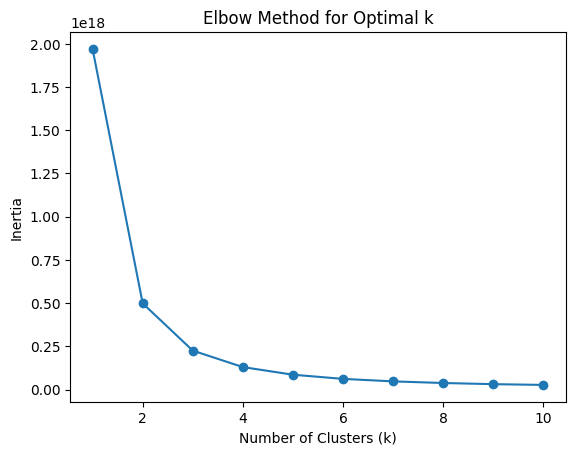

In [ ]:
X = Dataset[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



**Code Explanation:**

1. **Selecting Relevant Columns:**
   - `X = Dataset[['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id']]`: This line selects a subset of columns from the DataFrame `Dataset` to be used as features for the KMeans clustering algorithm.

2. **Initializing an Empty List for Inertia Values:**
   - `inertia_values = []`: This line creates an empty list to store the inertia values for different values of k.

3. **Looping Over Different Values of k:**
   - `for n_clusters in range(1, 11):`: This loop iterates over values of k from 1 to 10.

4. **Creating and Fitting KMeans Models:**
   - `kmeans = KMeans(n_clusters=n_clusters, random_state=42)`: This line creates a KMeans model with the current value of k.
   - `kmeans.fit(X)`: This line fits the KMeans model to the data.

5. **Appending Inertia Values:**
   - `inertia_values.append(kmeans.inertia_)`: This line appends the inertia (within-cluster sum of squares) of the current model to the list.

6. **Plotting the Elbow Method Curve:**
   - `plt.plot(range(1, 11), inertia_values, marker='o')`: This line plots the Elbow Method curve. The x-axis represents the number of clusters (k), and the y-axis represents the inertia values.
   - `plt.title('Elbow Method for Optimal k')`: This line adds a title to the plot.
   - `plt.xlabel('Number of Clusters (k)')` and `plt.ylabel('Inertia')`: These lines label the x-axis and y-axis, respectively.

7. **Displaying the Plot:**
   - `plt.show()`: This line displays the generated Elbow Method curve.



# **Elbow Method for optimal K**

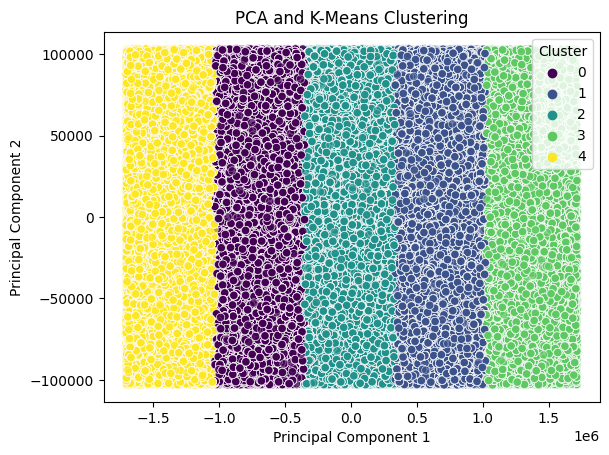

In [ ]:
n_clusters = 5

# K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans.fit_predict(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create DataFrame
Dataset = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
Dataset['Cluster'] = labels

# Visualize clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=Dataset, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



**Code Explanation:**

1. **Number of Clusters:**
   - `n_clusters = 5`: This line specifies the number of clusters for the K-Means algorithm.

2. **K-Means Clustering:**
   - `kmeans = KMeans(n_clusters=n_clusters, random_state=100)`: This line creates a KMeans model with the specified number of clusters.
   - `labels = kmeans.fit_predict(X)`: This line fits the KMeans model to the data (`X`) and assigns cluster labels to each data point.

3. **Applying PCA (Principal Component Analysis):**
   - `pca = PCA(n_components=2)`: This line creates a PCA model with two components.
   - `principal_components = pca.fit_transform(X)`: This line applies PCA to the data (`X`) and reduces it to two principal components.

4. **Creating DataFrame:**
   - `Dataset = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])`: This line creates a DataFrame with the two principal components.
   - `Dataset['Cluster'] = labels`: This line adds a column 'Cluster' to the DataFrame, containing the cluster labels assigned by K-Means.

5. **Visualizing Clusters:**
   - `sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=Dataset, palette='viridis', alpha=0.7)`: This line creates a scatter plot of the principal components, color-coded by cluster.
   - `plt.title('PCA and K-Means Clustering')`: This line adds a title to the plot.
   - `plt.xlabel('Principal Component 1')` and `plt.ylabel('Principal Component 2')`: These lines label the x-axis and y-axis, respectively.
   - `plt.legend(title='Cluster')`: This line adds a legend indicating the cluster labels.
   - `plt.show()`: This line displays the scatter plot.

